# Elon Musk

In [7]:
import pandas as pd
import numpy as np
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
tweets=pd.read_csv("C:\\Users\\data\\OneDrive\\Desktop\\ExcelR\\Elon_musk.csv",encoding='latin1')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
tweets.drop(['Unnamed: 0'],axis=1,inplace=True)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
tweets=[Text.strip()for Text in tweets.Text]
tweets=[Text for Text in tweets if Text]
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [11]:
!python -m spacy download en_core_web_md

2022-03-27 09:56:20.251872: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-03-27 09:56:20.251951: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [9]:
help(spacy.displacy.render)

Help on function render in module spacy.displacy:

render(docs: Union[Iterable[Union[spacy.tokens.doc.Doc, spacy.tokens.span.Span, dict]], spacy.tokens.doc.Doc, spacy.tokens.span.Span, dict], style: str = 'dep', page: bool = False, minify: bool = False, jupyter: Optional[bool] = None, options: Dict[str, Any] = {}, manual: bool = False) -> str
    Render displaCy visualisation.
    
    docs (Union[Iterable[Union[Doc, Span, dict]], Doc, Span, dict]]): Document(s) to visualise.
        a 'dict' is only allowed here when 'manual' is set to True
    style (str): Visualisation style, 'dep' or 'ent'.
    page (bool): Render markup as full HTML page.
    minify (bool): Minify HTML markup.
    jupyter (bool): Override Jupyter auto-detection.
    options (dict): Visualiser-specific options, e.g. colors.
    manual (bool): Don't parse `Doc` and instead expect a dict/list of dicts.
    RETURNS (str): Rendered HTML markup.
    
    DOCS: https://spacy.io/api/top-level#displacy.render
    USAGE: ht

In [12]:
nlp=spacy.load('en_core_web_md')
one_block=tweets[2]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [15]:
afinn=pd.read_csv("C:\\Users\\data\\OneDrive\\Desktop\\ExcelR\\Afinn.csv",sep=',',encoding='latin-1')
afinn.shape

(2477, 2)

In [16]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Arman
[nltk_data]     Soni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(" ".join(tweets))
sentences[0:10]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [19]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [20]:
affinity_scores=afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [21]:
nlp=spacy.load('en_core_web_md')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+= sentiment_lexicon.get(word.lemma_,0)
            return sent_score

In [26]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df

,sentence,sentiment value,word count,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,0
2,@joerogan @Spotify Great interview!,0,4,0
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13,0
4,Now on to the next for even more!!,0,8,0
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,0
920,"It may never pay out, as the stock cant b ht...",0,31,0
921,Details Aug 28.,0,3,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,0


In [23]:
sent_df['word count']=sent_df['sentence'].str.split().apply(len)
sent_df['word count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word count, dtype: int64

In [27]:
sent_df[sent_df.sentiment_value<0]

,sentence,sentiment value,word count,sentiment_value
79,No question that FSD should be viewed as reaso...,-1,14,-1
141,"Stop the sneaky moves, Charlie Ergen!",-1,6,-1
243,No heat shielding needed.,-1,4,-1
296,"No symptoms for past few days, apart from fati...",-1,9,-1
303,No symptoms right now.,-1,4,-1
380,No problem if theres a way get current design...,-1,13,-1
550,No more hydraulics.,-1,3,-1
614,Problems like that have been addressed.,-2,6,-2
714,Hard to see with naked eye.,-1,6,-1
872,Left by myself when I was 17.,-1,7,-1


In [28]:
sent_df.drop(['sentiment value'],axis=1,inplace=True)
sent_df

,sentence,word count,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,13,0
1,Have you tried it?,4,0
2,@joerogan @Spotify Great interview!,4,0
3,@gtera27 Doge is underestimated @teslacn Congr...,13,0
4,Now on to the next for even more!!,8,0
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",11,0
920,"It may never pay out, as the stock cant b ht...",31,0
921,Details Aug 28.,3,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,47,0


In [29]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,word count,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,13,0
1,Have you tried it?,4,0
2,@joerogan @Spotify Great interview!,4,0
3,@gtera27 Doge is underestimated @teslacn Congr...,13,0
4,Now on to the next for even more!!,8,0


In [30]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,word count,sentiment_value,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,13,0,0
1,Have you tried it?,4,0,1
2,@joerogan @Spotify Great interview!,4,0,2
3,@gtera27 Doge is underestimated @teslacn Congr...,13,0,3
4,Now on to the next for even more!!,8,0,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",11,0,919
920,"It may never pay out, as the stock cant b ht...",31,0,920
921,Details Aug 28.,3,0,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,47,0,922


<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

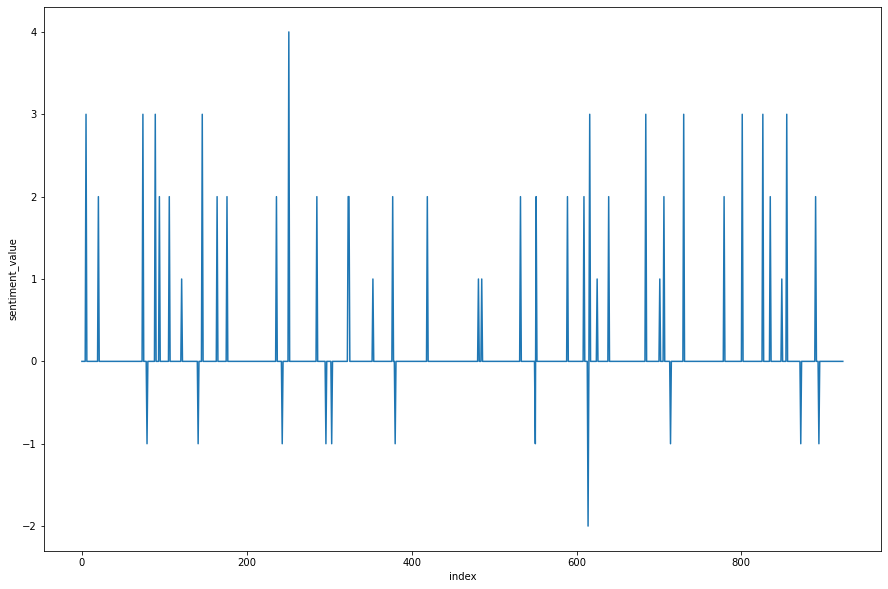

In [31]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)